First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

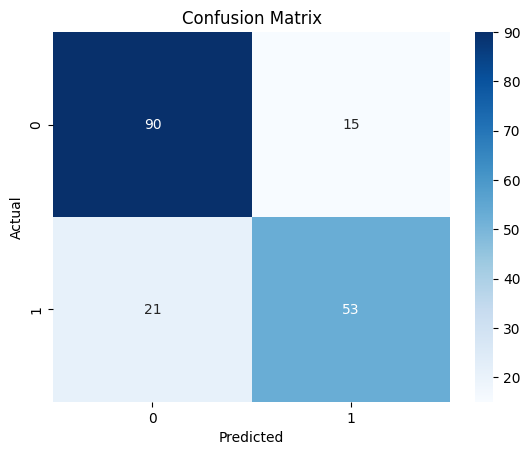

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
csv_file_path = '/content/Titanic-Dataset.csv'
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())

# Display summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Fill missing values (simple imputation for demonstration purposes)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Drop columns with too many missing values or not useful for the model
data.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

# Check again for missing values
print("\nMissing values in the dataset after imputation:")
print(data.isnull().sum())

# Select relevant features and the target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Separate features and target
X = data[features]
y = data[target]

# Preprocess the categorical features using one-hot encoding and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'SibSp', 'Parch', 'Fare']),
        ('cat', OneHotEncoder(), ['Pclass', 'Sex', 'Embarked'])
    ])

# Create a pipeline with preprocessing and logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'\nAccuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
